In [2]:
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os, sys, email
import gensim
from gensim.models import Doc2Vec
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from string import punctuation
import timeit
from sklearn.cluster import KMeans
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
start = timeit.default_timer()
import pandas as pd 

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


#### Load csv

In [3]:
df = pd.DataFrame.from_csv('classified.csv')

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


#### Remove \n \r from the content

In [5]:
df.content = df.content.str.replace('\n',' ')
df.content = df.content.str.replace('\r',' ')
df.content = df.content.str.lower()

#### Count number of category

In [6]:
df['count_catogory'] = df.category.str.replace('[','').replace(']','').replace('\'','').str.split(',').str.len()

#### A notice has assigned 46 category at most, it seems wired

In [7]:
max(df.count_catogory)

46

Text(0.5,1,'Distribution of the number of the category per notice')

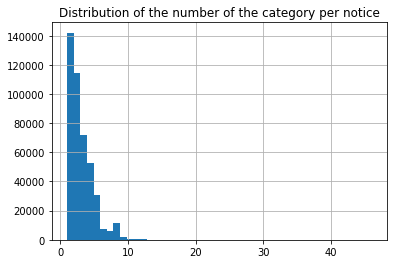

In [9]:
from matplotlib import pyplot as plt

df.hist(column='count_catogory', bins=46)
plt.title('Distribution of the number of the category per notice')

#### Check total unique category

In [10]:
category = list(set(df.category.values))
print(len(category))

final_category = []
for c in category:
    for cc in c.split(','):
        cc = cc.strip()
        final_category.append(cc.replace('[','').replace(']','').replace('\'','').replace(',',''))
print(len(final_category))

final_category = list(set(final_category)) 
print(len(final_category))

4213
34458
34


### List all the category

In [58]:
final_category

['Auctions',
 'AOO',
 'Summons-Civil',
 'Public Hearings',
 'Citation',
 'Notice to Interested Persons',
 'Elections',
 'Property Notice',
 'Metro Districts',
 'Proceedings',
 'License Suspension',
 'Tax Deeds',
 'Estate Claims',
 'Probate Notices',
 'Bids',
 'AOD',
 'Schedule of Meetings',
 'Government Notices',
 'Miscellaneous',
 'Summons-Family Law',
 'Prevailing Wage Notices',
 'Water Resumes',
 'Lien Sales',
 'Liquor Notices',
 'Forfeited Property',
 'Foreclosures',
 'AOI',
 'Ordinances',
 'Seizures',
 'Name Changes',
 'Summon',
 'Divorces',
 'Tax Notice',
 'Fictitious Business Names (DBA)']

#### Total 34 category

#### Remove duplicate category, some of the notice has duplicate category assigned

In [59]:
def filtered_duplicate(row):
    temp = []
    for cc in row.split(','):
        cc = cc.strip()
        temp.append(cc.replace('[','').replace(']','').replace('\'','').replace(',',''))
    
#     if len(temp)!=len(list(set(temp))):
#         print(temp)
#         print(len(temp))
#         print(len(list(set(temp))))
#         print(temp)
    return list(set(temp))

In [60]:
df['category_no_duplicate'] = df.category.progress_apply(filtered_duplicate)

#### Check number of notice that has only one catogery

In [61]:
df['category_no_duplicate_str'] = df.category_no_duplicate.astype(str)

In [62]:
df['count_catogory_no_duplicate'] = df.category_no_duplicate_str.str.replace('[','').replace(']','').replace('\'','').str.split(',').str.len()

#### Overall distribution of the category after duplicate removed

In [63]:
unique_category = df[df.count_catogory_no_duplicate==1].category_no_duplicate.tolist()
flat_list = [item for sublist in unique_category for item in sublist]

unique_count = {}
for c in flat_list:
    unique_count[c] = unique_count.get(c, 0) + 1

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


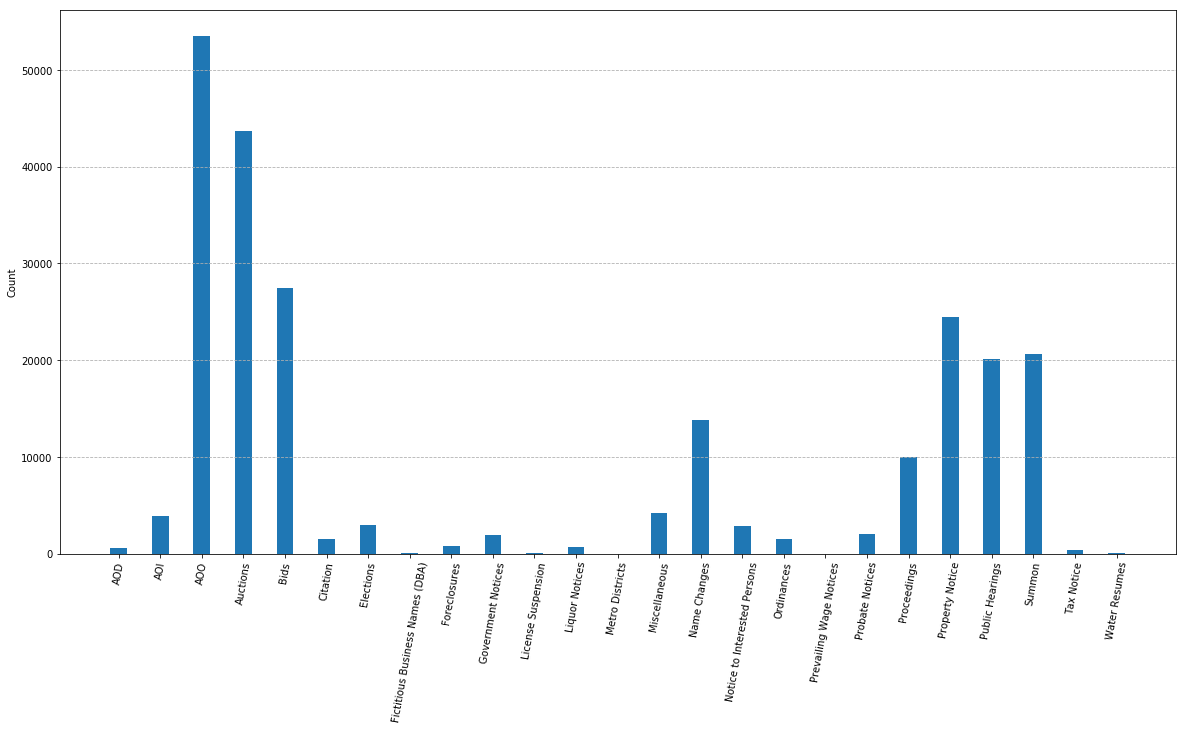

In [64]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
width = 1/1.5
lists = sorted(unique_count.items()) # sorted by key, return a list of tuples
x, y = zip(*lists)

ax.bar(x,y,width=0.4)
ax.set_xticks(np.arange(len(x)))
ax.set_ylabel("Count")
ax.set_xticklabels(x, rotation = 80, zorder=100)
plt.gca().yaxis.grid(linestyle='--')

fig.show()

#### After removing duplicate, a notice has at most 20 categories

In [65]:
max(df.count_catogory_no_duplicate)

20

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DF6DC94240>]],
      dtype=object)

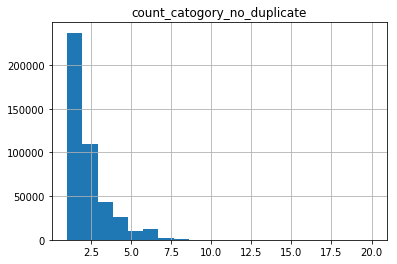

In [66]:
df.hist(column='count_catogory_no_duplicate', bins=20)

#### Number of notice in the all the categories, where a notice has assigned only one category 

In [67]:
cat_count = {}

for c in final_category:
    count = len(df[df[c]==True])
    cat_count[c]=count

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


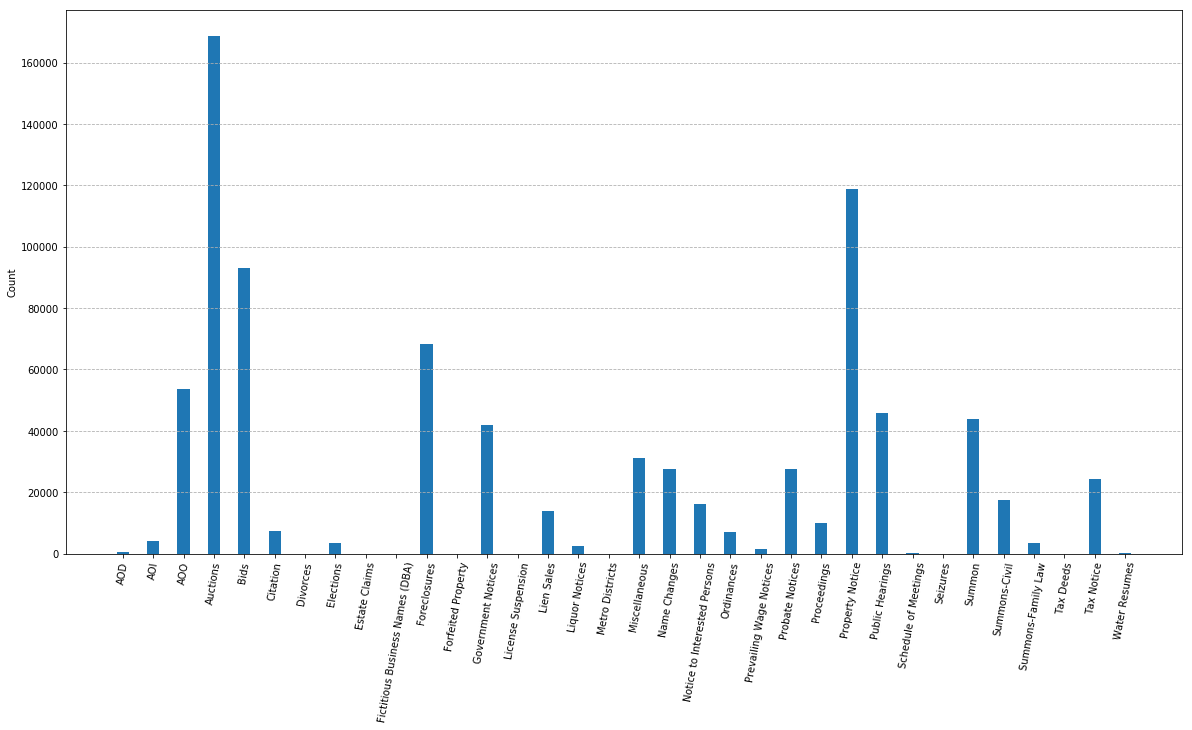

In [68]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
width = 1/1.5
lists = sorted(cat_count.items()) # sorted by key, return a list of tuples
x, y = zip(*lists)

ax.bar(x,y,width=0.4)
ax.set_xticks(np.arange(len(x)))
ax.set_ylabel("Count")
ax.set_xticklabels(x, rotation = 80, zorder=100)
plt.gca().yaxis.grid(linestyle='--')
fig.show()

#### Generate all the combination of the categories and count

In [69]:
unique_category = df.category_no_duplicate.tolist()

In [70]:
unique_category[:5]

[['Auctions'],
 ['License Suspension'],
 ['Elections'],
 ['Auctions'],
 ['Auctions']]

In [71]:
unique_count = {}
for c in unique_category:
    c = sorted(c)
    c = str(c)
    unique_count[c] = unique_count.get(c, 0) + 1

In [72]:
sorted_by_value = sorted(unique_count.items(), key=lambda kv: kv[1], reverse=True)

In [73]:
sorted_by_value[:100]

[("['AOO']", 53510),
 ("['Auctions']", 43661),
 ("['Bids']", 27460),
 ("['Auctions', 'Foreclosures']", 26987),
 ("['Property Notice']", 24487),
 ("['Probate Notices', 'Property Notice']", 21191),
 ("['Summon']", 20591),
 ("['Public Hearings']", 20123),
 ("['Name Changes']", 13768),
 ("['Summon', 'Summons-Civil']", 12457),
 ("['Auctions', 'Government Notices', 'Property Notice']", 10027),
 ("['Proceedings']", 10019),
 ("['Auctions', 'Bids', 'Property Notice']", 9972),
 ("['Name Changes', 'Public Hearings']", 9585),
 ("['Auctions', 'Bids', 'Property Notice', 'Tax Notice']", 9148),
 ("['Auctions', 'Bids', 'Foreclosures', 'Government Notices', 'Miscellaneous', 'Property Notice']",
  7972),
 ("['Auctions', 'Bids']", 4438),
 ("['Auctions', 'Bids', 'Foreclosures', 'Property Notice']", 4284),
 ("['Miscellaneous']", 4182),
 ("['AOI']", 3911),
 ("['Bids', 'Citation']", 3652),
 ("['Auctions', 'Government Notices']", 3641),
 ("['Auctions', 'Foreclosures', 'Government Notices', 'Lien Sales', 'Tax N

#### Number of state

In [75]:
unique_state = df.state.unique()
print(unique_state)

['Mississippi' 'Louisiana' 'Wyoming' 'Arkansas' 'Tennessee' 'New Mexico'
 'Nevada' 'Arizona']


In [76]:
def plot_category(df_temp, state):
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(111)
    width = 1/1.5
    
    unique_category = df_temp[df_temp.count_catogory_no_duplicate==1].category_no_duplicate.tolist()
    flat_list = [item for sublist in unique_category for item in sublist]
    #print(flat_list)
    unique_count = {}
    for c in flat_list:
        #print(c, type(c))
        unique_count[c] = unique_count.get(c, 0) + 1
    
    lists = sorted(unique_count.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists)

    ax.bar(x,y,width=0.4)
    ax.set_xticks(np.arange(len(x)))
    ax.set_ylabel("Count")
    ax.set_xticklabels(x, rotation = 80, zorder=100)
    plt.gca().yaxis.grid(linestyle='--')
    ax.set_title('State: ' + state)
    fig.show()

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


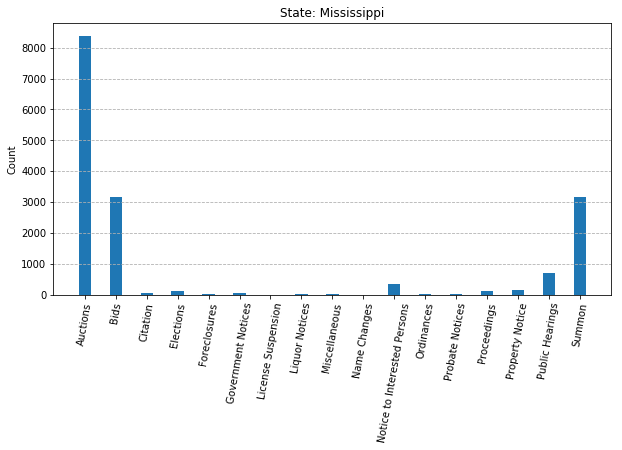

In [77]:
df_temp = df[df.state=='Mississippi']
plot_category(df_temp, 'Mississippi')

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


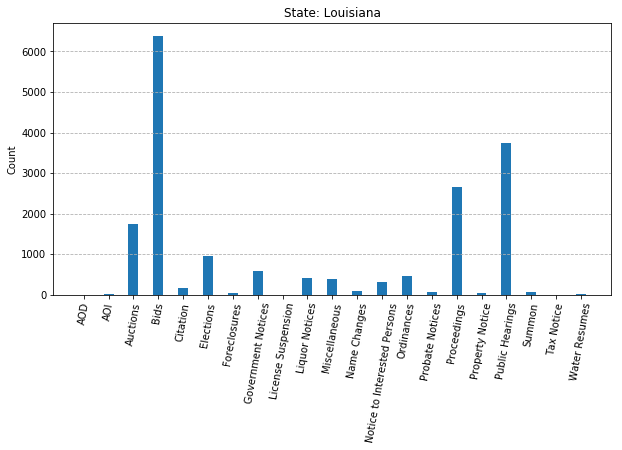

In [78]:
df_temp = df[df.state=='Louisiana']
plot_category(df_temp, 'Louisiana')

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


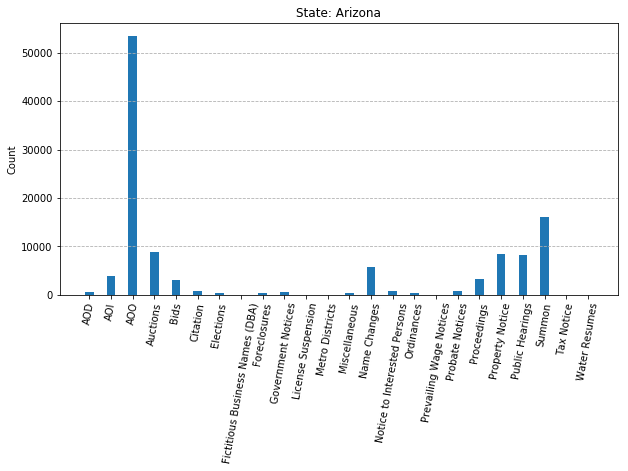

In [79]:
df_temp = df[df.state=='Arizona']
plot_category(df_temp, 'Arizona')

In [80]:
unique_count

{"['Auctions']": 43661,
 "['License Suspension']": 27,
 "['Elections']": 2952,
 "['Proceedings']": 10019,
 "['Bids']": 27460,
 "['Auctions', 'Bids']": 4438,
 "['AOO']": 53510,
 "['AOI']": 3911,
 "['AOD']": 547,
 "['AOI', 'Auctions']": 333,
 "['AOO', 'Auctions']": 113,
 "['Auctions', 'Proceedings']": 116,
 "['Auctions', 'Elections']": 20,
 "['Notice to Interested Persons', 'Probate Notices', 'Property Notice']": 567,
 "['Auctions', 'Bids', 'Property Notice', 'Tax Notice']": 9148,
 "['Probate Notices', 'Property Notice']": 21191,
 "['Citation']": 1554,
 "['Auctions', 'Foreclosures']": 26987,
 "['Auctions', 'Name Changes', 'Public Hearings']": 214,
 "['Auctions', 'Public Hearings']": 580,
 "['Property Notice']": 24487,
 "['Auctions', 'Bids', 'Property Notice']": 9972,
 "['Public Hearings']": 20123,
 "['Ordinances']": 1464,
 "['Summon', 'Summons-Civil', 'Summons-Family Law']": 1399,
 "['Auctions', 'Government Notices', 'Ordinances', 'Property Notice']": 195,
 "['Auctions', 'Foreclosures', 

In [81]:
# CONSIDER_CAT = []
# for u_c in final_category:
#     cnt = unique_count[u_c]
#     if cnt>100:
#         CONSIDER_CAT.append(u_c)

In [89]:
CONSIDER_CAT = final_category
print(CONSIDER_CAT)

['Auctions', 'AOO', 'Summons-Civil', 'Public Hearings', 'Citation', 'Notice to Interested Persons', 'Elections', 'Property Notice', 'Metro Districts', 'Proceedings', 'License Suspension', 'Tax Deeds', 'Estate Claims', 'Probate Notices', 'Bids', 'AOD', 'Schedule of Meetings', 'Government Notices', 'Miscellaneous', 'Summons-Family Law', 'Prevailing Wage Notices', 'Water Resumes', 'Lien Sales', 'Liquor Notices', 'Forfeited Property', 'Foreclosures', 'AOI', 'Ordinances', 'Seizures', 'Name Changes', 'Summon', 'Divorces', 'Tax Notice', 'Fictitious Business Names (DBA)']


In [90]:
cat_dist = []

for s in unique_state:
    df_temp = df[df.state==s]
    unique_category = df_temp[df_temp.count_catogory_no_duplicate==1].category_no_duplicate.tolist()
    flat_list = [item for sublist in unique_category for item in sublist]
    #print(flat_list)
    unique_count = {}
    for c in CONSIDER_CAT:
        unique_count[c] = 0
    for c in flat_list:
        #print(c, type(c))
        if c in CONSIDER_CAT:
            unique_count[c] = unique_count.get(c, 0) + 1
        
    lists = sorted(unique_count.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists)
    cat_dist.append(y)

In [91]:
unique_category = sorted(CONSIDER_CAT)
print(len(cat_dist[0]))

34


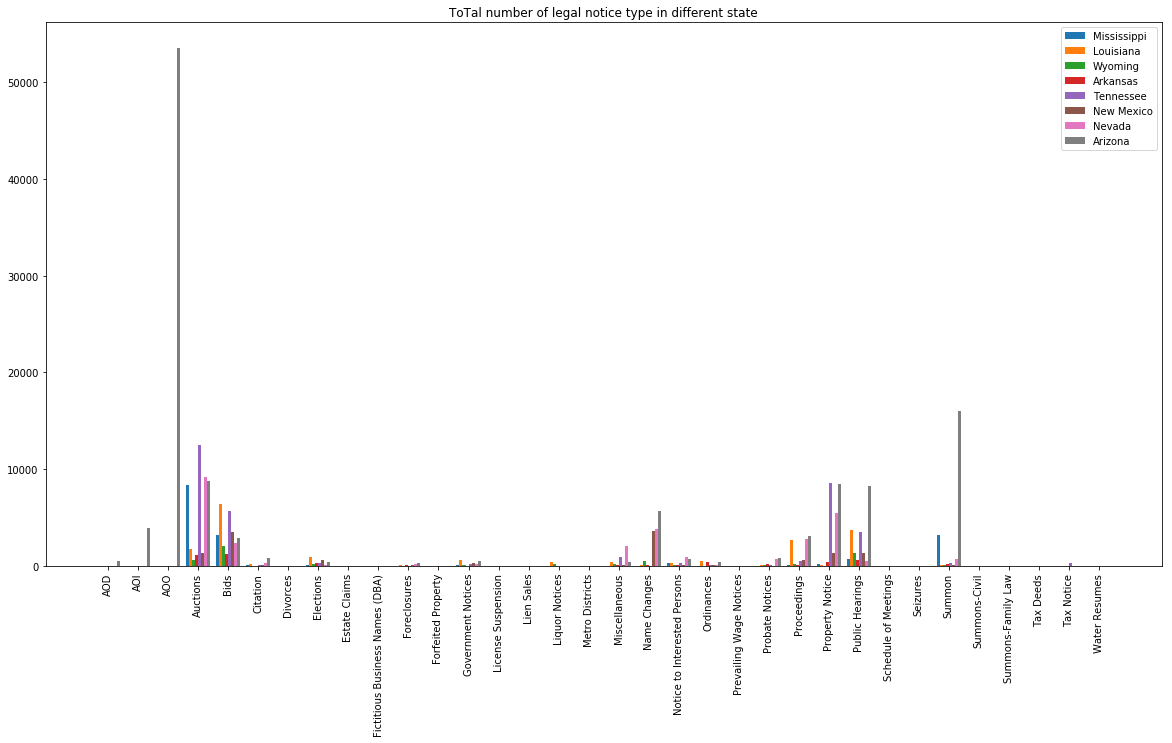

In [99]:
import numpy as np
import matplotlib.pyplot as plt

N = 34

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)

ind = np.arange(N)    # the x locations for the groups
width = 0.1         # the width of the bars
w= 0.1
p = []
for c_d in cat_dist:
    plt.bar(ind+width, c_d, w)
    width = width + 0.1
    
ax.set_title('ToTal number of legal notice type in different state')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((sorted(CONSIDER_CAT)), rotation =90)

ax.legend(unique_state)
# ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.show()

In [101]:
cat_dist_norm = []

for c_d in np.array(cat_dist).T:
    #print(c_d)
    temp = []
    for v in c_d:
        temp.append(v/sum(c_d))
    cat_dist_norm.append(temp)
    #print(temp, sum(c_d))
cat_dist_norm = np.array(cat_dist_norm).T    

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


In [102]:
len(cat_dist_norm[0])

34

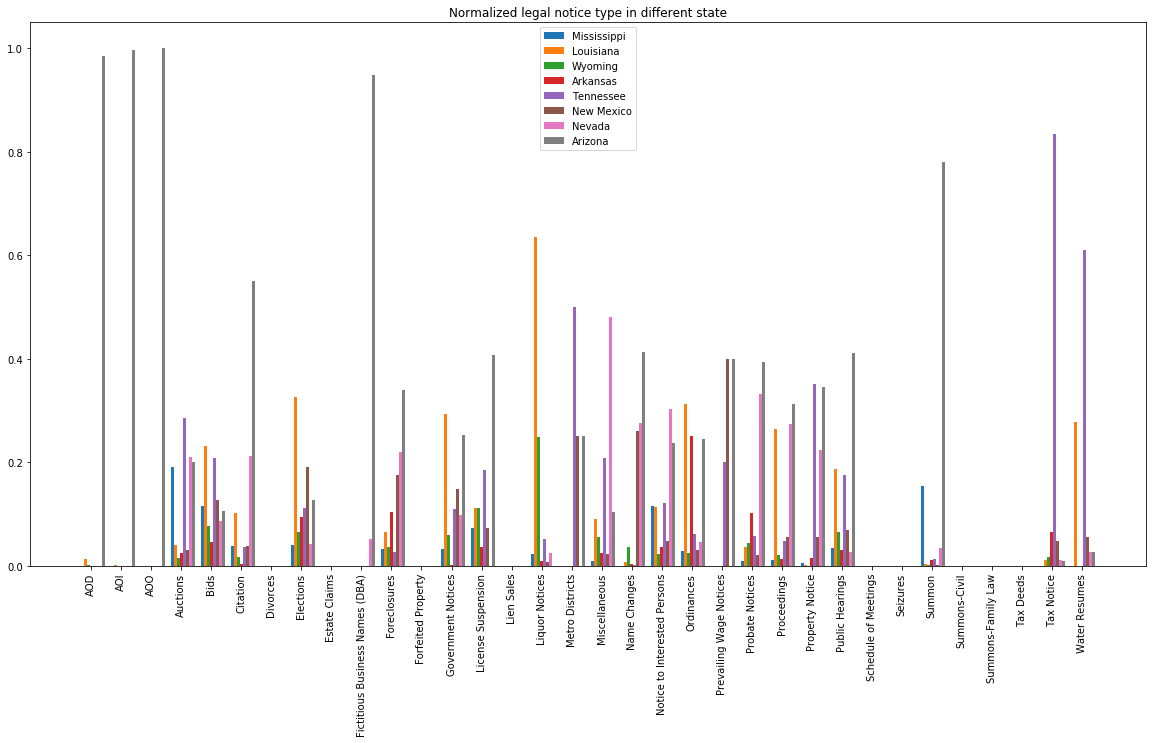

In [103]:
import numpy as np
import matplotlib.pyplot as plt

N = 34

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)

ind = np.arange(N)    # the x locations for the groups
width = 0.2         # the width of the bars
w= 0.1
p = []
for c_d in cat_dist_norm:
    plt.bar(ind+width, c_d, w)
    width = width + 0.1
    
ax.set_title('Normalized legal notice type in different state')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((sorted(CONSIDER_CAT)), rotation =90)

ax.legend(unique_state)
# ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.show()

In [104]:
df.columns

Index(['state', 'id', 'link', 'county', 'newspaper', 'date', 'content',
       'notice_id', 'category', 'temp', 'Auctions', 'License Suspension',
       'Elections', 'Proceedings', 'Bids', 'AOO', 'AOI', 'AOD',
       'Property Notice', 'Probate Notices', 'Notice to Interested Persons',
       'Tax Notice', 'Citation', 'Foreclosures', 'Public Hearings',
       'Name Changes', 'Ordinances', 'Summons-Civil', 'Summons-Family Law',
       'Summon', 'Government Notices', 'Lien Sales', 'Liquor Notices',
       'Miscellaneous', 'Prevailing Wage Notices', 'Metro Districts',
       'Divorces', 'Schedule of Meetings', 'Fictitious Business Names (DBA)',
       'Water Resumes', 'Tax Deeds', 'Seizures', 'Forfeited Property',
       'Estate Claims', 'count_catogory', 'category_no_duplicate',
       'category_no_duplicate_str', 'count_catogory_no_duplicate'],
      dtype='object')

### Save to csv

In [106]:
df[(df.count_catogory_no_duplicate==1) & (df['Probate Notices']==True)].to_csv('./Data/Probate_Notices.csv')

In [110]:
df[(df.count_catogory_no_duplicate==1) & (df['AOI']==True)].to_csv('./Data/AOI.csv')

In [111]:
df[(df.count_catogory_no_duplicate==1) & (df['AOD']==True)].to_csv('./Data/AOD.csv')

In [109]:
df[(df.count_catogory_no_duplicate==1) & (df['Water Resumes']==True)].to_csv('./Data/Water_Resumes.csv')

In [ ]:
df[(df.count_catogory_no_duplicate==1) & (df['Ordinances']==True)].to_csv('./Data/Ordinances.csv')

In [185]:
df[(df.count_catogory_no_duplicate==1) & (df['Notice to Interested Persons']==True)].to_csv('./Data/Notice_to_Interested_Persons.csv')

In [ ]:
df[(df.count_catogory_no_duplicate==1) & (df.AOO==True)].to_csv('./Data/AOO.csv')

In [ ]:
df[(df.count_catogory_no_duplicate==1) & (df.Auctions==True)].to_csv('./Data/Auctions.csv')

In [ ]:
df[(df.count_catogory_no_duplicate==1) & (df.Bids==True)].to_csv('./Data/Bids.csv')

In [ ]:
df[(df.count_catogory_no_duplicate==1) & (df['Name Changes']==True)].to_csv('./Data/Name_Changes.csv')

In [ ]:
df[(df.count_catogory_no_duplicate==1) & (df['Proceedings']==True)].to_csv('./Data/Proceedings.csv')

In [ ]:
df[(df.count_catogory_no_duplicate==1) & (df['Property Notice']==True)].to_csv('./Data/Property_Notice.csv')

In [87]:
df[(df.count_catogory_no_duplicate==1) & (df['Public Hearings']==True)].to_csv('./Data/Public_Hearings.csv')

In [88]:
df[(df.count_catogory_no_duplicate==1) & (df['Summon']==True)].to_csv('./Data/Summon.csv')

In [89]:
df[(df.count_catogory_no_duplicate==1) & (df['Tax Notice']==True)].to_csv('./Data/Tax_Notice.csv')

In [178]:
df[(df.count_catogory_no_duplicate==1) & (df['Foreclosures']==True)].to_csv('./Data/Foreclosures.csv')

In [179]:
df[(df.count_catogory_no_duplicate==1) & (df['Citation']==True)].to_csv('./Data/Citation.csv')

In [183]:
df[(df.count_catogory_no_duplicate==1) & (df['License Suspension']==True)].to_csv('./Data/License_Suspension.csv')

In [184]:
df[(df.count_catogory_no_duplicate==1) & (df['Liquor Notices']==True)].to_csv('./Data/Liquor_Notices.csv')